# Generated Datasets

From this guide: https://scikit-learn.org/stable/datasets/sample_generators.html

## Overview

In addition, scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.

## [Generators for classification and clustering](https://scikit-learn.org/stable/datasets/sample_generators.html#generators-for-classification-and-clustering)

These generators produce: 
* a matrix of features (`X`) and 
* corresponding discrete targets (`y`).

### Single label

Both 
* [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) and 
* [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) 

create multiclass datasets by allocating each class one or more normally-distributed clusters of points.

* ➢ `make_blobs` provides greater control regarding the centers and standard deviations of each cluster, and is *used to demonstrate clustering*.
* ➢ `make_classification` specialises in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

**Also:**
* [`make_gaussian_quantiles`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles) divides a single Gaussian cluster into near-equal-size classes separated by concentric hyperspheres. 
* [`make_hastie_10_2`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html#sklearn.datasets.make_hastie_10_2) generates a similar binary, 10-dimensional problem.

**Also:**
* [`make_circles`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and 
* [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) 

generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise. They are useful for *visualisation*.

* ➢ `make_circles` produces Gaussian data with a spherical decision boundary for binary classification, while 
* ➢ `make_moons` produces two interleaving half circles.

---

### 📚 Example: [Plot randomly generated classification dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html)

This example plots several randomly generated classification datasets. **For easy visualization**, all datasets have **2 features**, plotted on the *x* and *y* axis. The **color** of each point represents its class **label**.

* The first 4 plots use the `make_classification` with *different numbers of informative features*, clusters per class and classes. 
* The final 2 plots use `make_blobs` and `make_gaussian_quantiles`.

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

Signatures:

```python
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
```

```python
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
```

```python
make_gaussian_quantiles(
    *,
    mean=None,
    cov=1.0,
    n_samples=100,
    n_features=2,
    n_classes=3,
    shuffle=True,
    random_state=None,
)
```

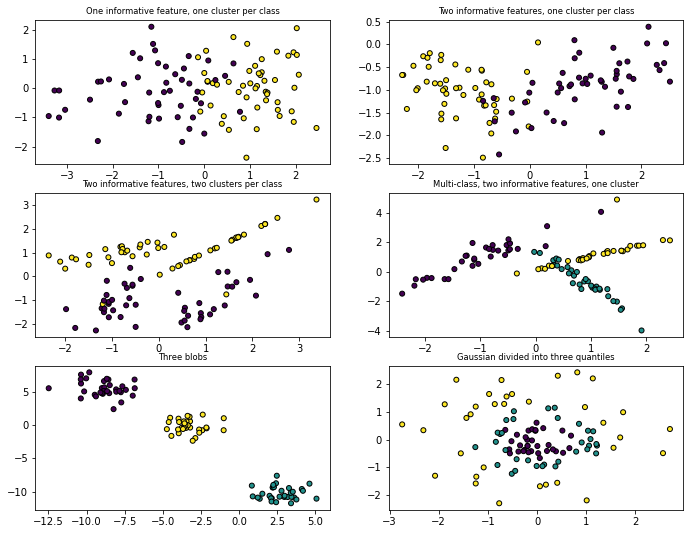

In [3]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=1,
    n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize='small')
X1, Y1 = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    n_classes=3
)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.show()

---

### Multilabel

`make_multilabel_classification` generates random samples with multiple labels, reflecting a bag of words drawn from a mixture of topics. 

The number of *topics* for each document is drawn from a Poisson distribution, and the topics themselves are drawn from a fixed random distribution. 

Similarly, the number of *words* is drawn from Poisson, with words drawn from a multinomial, where each topic defines a probability distribution over words. 

Simplifications with respect to true bag-of-words mixtures include:
* Per-topic word distributions are independently drawn, where in reality all would be affected by a sparse base distribution, and would be correlated.
* For a document generated from multiple topics, all topics are weighted equally in generating its bag of words.
* Documents without labels words at random, rather than from a base distribution.

**📚 Example:**
* [Plot randomly generated multilabel dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_multilabel_dataset.html)

### Biclustering

See the following:

<table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_biclusters.html#sklearn.datasets.make_biclusters" title="sklearn.datasets.make_biclusters"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_biclusters</span></code></a>(shape,&nbsp;n_clusters,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Generate an array with constant block diagonal structure for biclustering.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_checkerboard.html#sklearn.datasets.make_checkerboard" title="sklearn.datasets.make_checkerboard"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_checkerboard</span></code></a>(shape,&nbsp;n_clusters,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Generate an array with block checkerboard structure for biclustering.</p></td>
</tr>
</tbody>
</table>

## [Generators for regression](https://scikit-learn.org/stable/datasets/sample_generators.html#generators-for-regression)

[`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) produces regression targets as an optionally-sparse random linear combination of random features, with noise. Its informative features may be uncorrelated, or low rank (few features account for most of the variance).

Other regression generators generate functions deterministically from randomized features. 
* [`make_sparse_uncorrelated`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_uncorrelated.html#sklearn.datasets.make_sparse_uncorrelated) produces a target as a linear combination of four features with fixed coefficients. 

Others encode explicitly non-linear relations: 
* [`make_friedman1`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html#sklearn.datasets.make_friedman1) is related by polynomial and sine transforms; 
* [`make_friedman2`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman2.html#sklearn.datasets.make_friedman2) includes feature multiplication and reciprocation; and 
* [`make_friedman3`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman3.html#sklearn.datasets.make_friedman3) is similar with an arctan transformation on the target.

## [Generators for manifold learning](https://scikit-learn.org/stable/datasets/sample_generators.html#generators-for-manifold-learning)

See the following:

<table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve" title="sklearn.datasets.make_s_curve"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_s_curve</span></code></a>([n_samples,&nbsp;noise,&nbsp;random_state])</p></td>
<td><p>Generate an S curve dataset.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll" title="sklearn.datasets.make_swiss_roll"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_swiss_roll</span></code></a>([n_samples,&nbsp;noise,&nbsp;random_state])</p></td>
<td><p>Generate a swiss roll dataset.</p></td>
</tr>
</tbody>
</table>

## [Generators for decomposition](https://scikit-learn.org/stable/datasets/sample_generators.html#generators-for-decomposition)

See the following:

<table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix" title="sklearn.datasets.make_low_rank_matrix"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_low_rank_matrix</span></code></a>([n_samples,&nbsp;…])</p></td>
<td><p>Generate a mostly low rank matrix with bell-shaped singular values.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_sparse_coded_signal.html#sklearn.datasets.make_sparse_coded_signal" title="sklearn.datasets.make_sparse_coded_signal"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_sparse_coded_signal</span></code></a>(n_samples,&nbsp;*,&nbsp;…)</p></td>
<td><p>Generate a signal as a sparse combination of dictionary elements.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_spd_matrix.html#sklearn.datasets.make_spd_matrix" title="sklearn.datasets.make_spd_matrix"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_spd_matrix</span></code></a>(n_dim,&nbsp;*[,&nbsp;random_state])</p></td>
<td><p>Generate a random symmetric, positive-definite matrix.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../modules/generated/sklearn.datasets.make_sparse_spd_matrix.html#sklearn.datasets.make_sparse_spd_matrix" title="sklearn.datasets.make_sparse_spd_matrix"><code class="xref py py-obj docutils literal notranslate"><span class="pre">make_sparse_spd_matrix</span></code></a>([dim,&nbsp;alpha,&nbsp;…])</p></td>
<td><p>Generate a sparse symmetric definite positive matrix.</p></td>
</tr>
</tbody>
</table>